In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dano/merged5.csv", index_col=0)

In [ ]:
df

,region,unemployed,infections,deaths,healed,population,procent_unemployed,procent_infections,procent_healed,procent_deaths,...,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp,vrp,vrp_norm
0,Адыгея,17898,5828.0,49.0,4557.0,463088.0,0.038649,0.012585,0.009840,0.000106,...,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6,143000.0,0.308797
1,Алтай,15186,7296.0,24.0,6207.0,220181.0,0.068971,0.033136,0.028190,0.000109,...,46.457233,2.267008,1.007107,24.1,4.2,42.00,10.8,64.1,63000.0,0.286128
2,Алтайский край,47654,18628.0,384.0,17392.0,2317153.0,0.020566,0.008039,0.007506,0.000166,...,85.212759,3.559505,1.304013,17.5,2.6,41.37,14.5,71.7,672000.0,0.290011
3,Амурская,25986,7313.0,65.0,6864.0,790044.0,0.032892,0.009256,0.008688,0.000082,...,136.036727,4.147556,1.547283,15.8,2.6,44.35,15.8,58.9,449000.0,0.568323
4,Архангельская,22140,21299.0,262.0,13985.0,1092424.0,0.020267,0.019497,0.012802,0.000240,...,165.969440,4.990174,1.563425,12.7,1.4,40.57,12.8,67.1,559000.0,0.511706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Хакасия,17068,7700.0,83.0,6276.0,534262.0,0.031947,0.014412,0.011747,0.000155,...,84.013087,3.704567,1.236817,19.0,2.3,43.94,-5.8,72.9,267000.0,0.499755
79,Челябинская,106538,18836.0,186.0,14198.0,3466369.0,0.030735,0.005434,0.004096,0.000054,...,134.758013,5.352160,1.522448,12.9,1.3,49.70,11.0,70.8,1615.0,0.000466
80,Чувашия,42008,9447.0,190.0,7616.0,1217818.0,0.034494,0.007757,0.006254,0.000156,...,114.768381,5.740644,1.236814,17.4,2.0,40.01,14.0,70.3,348000.0,0.285757
81,Ямало-Ненецкий АО,8938,19261.0,128.0,14760.0,544444.0,0.016417,0.035377,0.027110,0.000235,...,283.547987,3.360957,3.113967,5.7,0.8,80.20,17.0,51.4,2768.0,0.005084


In [ ]:
df.region.unique()

array(['Адыгея', 'Алтай', 'Алтайский край', 'Амурская', 'Архангельская',
       'Астраханская', 'Башкортостан', 'Белгородская', 'Брянская',
       'Бурятия', 'Владимирская', 'Волгоградская', 'Вологодская',
       'Воронежская', 'Дагестан', 'Еврейская АО', 'Забайкальский край',
       'Ивановская', 'Ингушетия', 'Иркутская', 'Кабардино-Балкария',
       'Калининградская', 'Калмыкия', 'Калужская', 'Камчатский край',
       'Карачаево-Черкессия', 'Карелия', 'Кемеровская', 'Кировская',
       'Коми', 'Костромская', 'Краснодарский край', 'Красноярский край',
       'Крым', 'Курганская', 'Курская', 'Ленинградская', 'Липецкая',
       'Магаданская', 'Марий Эл', 'Мордовия', 'Москва', 'Московская',
       'Мурманская', 'Ненецкий АО', 'Нижегородская', 'Новгородская',
       'Новосибирская', 'Омская', 'Оренбургская', 'Орловская',
       'Пензенская', 'Пермский край', 'Приморский край', 'Псковская',
       'Ростовская', 'Рязанская', 'Самарская', 'Санкт-Петербург',
       'Саратовская', 'Саха', 'Сах

In [ ]:
df = df[(df.region!="Москва") & (df.region!="Ингушетия") & (df.region!="Карачаево-Черкессия") & (df.region!="Дагестан") & (df.region!="Кабардино-Балкария")]

In [ ]:
df

,region,unemployed,infections,deaths,healed,population,procent_unemployed,procent_infections,procent_healed,procent_deaths,...,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp,vrp,vrp_norm
0,Адыгея,17898,5828.0,49.0,4557.0,463088.0,0.038649,0.012585,0.009840,0.000106,...,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6,143000.0,0.308797
1,Алтай,15186,7296.0,24.0,6207.0,220181.0,0.068971,0.033136,0.028190,0.000109,...,46.457233,2.267008,1.007107,24.1,4.2,42.00,10.8,64.1,63000.0,0.286128
2,Алтайский край,47654,18628.0,384.0,17392.0,2317153.0,0.020566,0.008039,0.007506,0.000166,...,85.212759,3.559505,1.304013,17.5,2.6,41.37,14.5,71.7,672000.0,0.290011
3,Амурская,25986,7313.0,65.0,6864.0,790044.0,0.032892,0.009256,0.008688,0.000082,...,136.036727,4.147556,1.547283,15.8,2.6,44.35,15.8,58.9,449000.0,0.568323
4,Архангельская,22140,21299.0,262.0,13985.0,1092424.0,0.020267,0.019497,0.012802,0.000240,...,165.969440,4.990174,1.563425,12.7,1.4,40.57,12.8,67.1,559000.0,0.511706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Хакасия,17068,7700.0,83.0,6276.0,534262.0,0.031947,0.014412,0.011747,0.000155,...,84.013087,3.704567,1.236817,19.0,2.3,43.94,-5.8,72.9,267000.0,0.499755
79,Челябинская,106538,18836.0,186.0,14198.0,3466369.0,0.030735,0.005434,0.004096,0.000054,...,134.758013,5.352160,1.522448,12.9,1.3,49.70,11.0,70.8,1615.0,0.000466
80,Чувашия,42008,9447.0,190.0,7616.0,1217818.0,0.034494,0.007757,0.006254,0.000156,...,114.768381,5.740644,1.236814,17.4,2.0,40.01,14.0,70.3,348000.0,0.285757
81,Ямало-Ненецкий АО,8938,19261.0,128.0,14760.0,544444.0,0.016417,0.035377,0.027110,0.000235,...,283.547987,3.360957,3.113967,5.7,0.8,80.20,17.0,51.4,2768.0,0.005084


<Axes: >

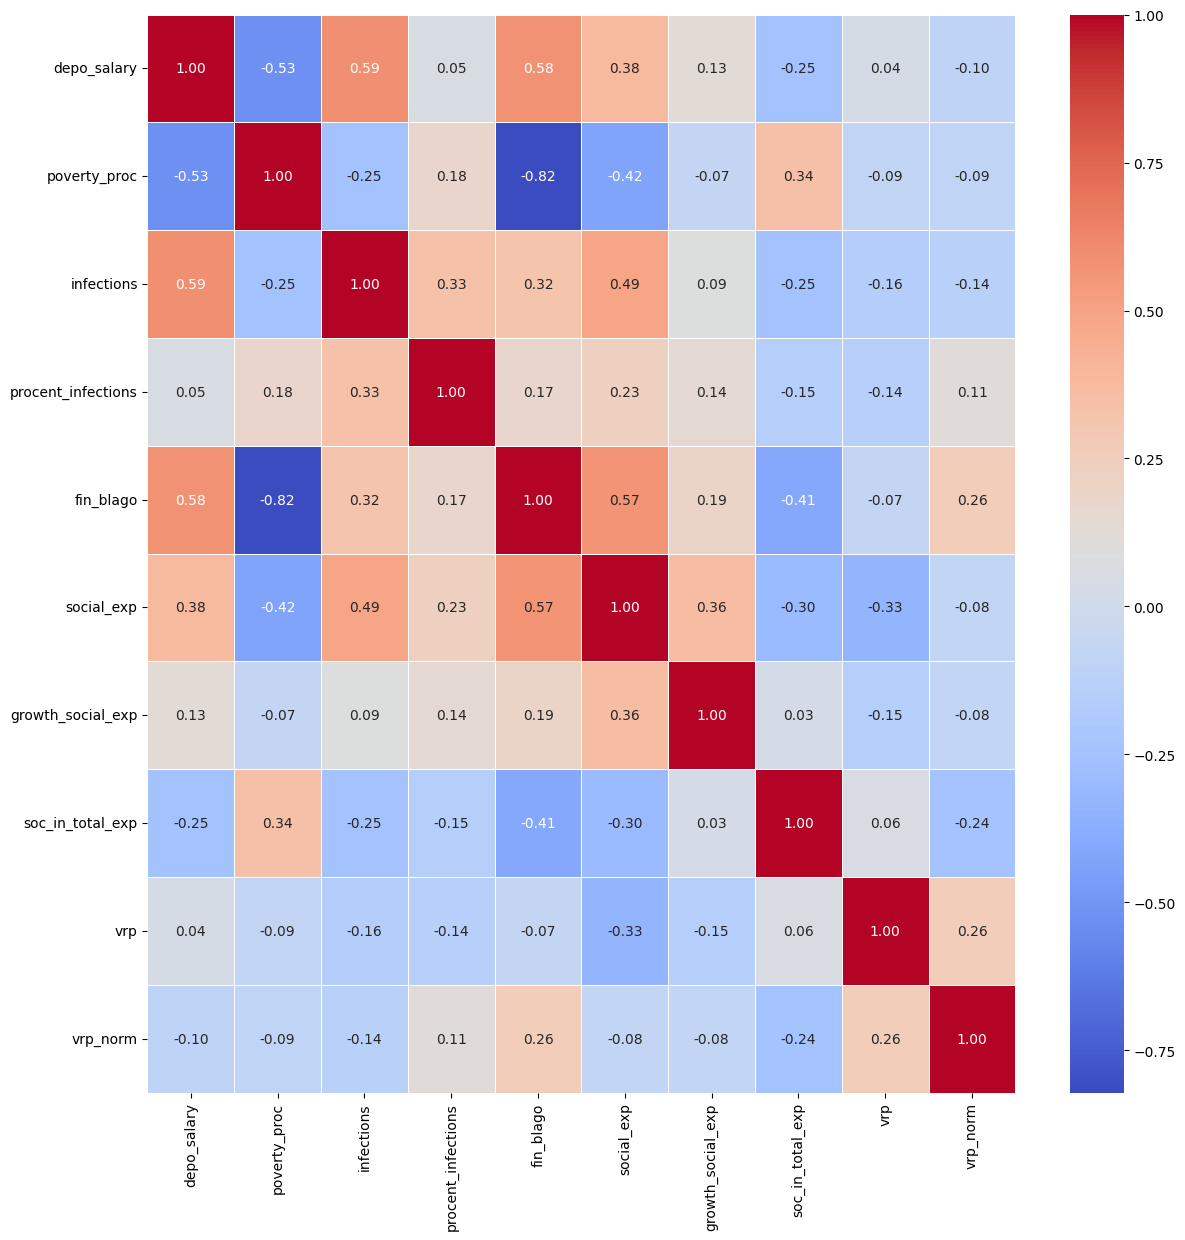

In [ ]:
import matplotlib.pyplot as plt
columns_for_x = ['depo_salary', 'poverty_proc', 'infections', 'procent_infections','fin_blago',
       'social_exp', 'growth_social_exp',
       'soc_in_total_exp', 'vrp', 'vrp_norm']

plt.figure(figsize=(14, 14))
corr = df[columns_for_x].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [ ]:
df['const'] = 1

In [ ]:
df.columns

Index(['region', 'unemployed', 'infections', 'deaths', 'healed', 'population',
       'procent_unemployed', 'procent_infections', 'procent_healed',
       'procent_deaths', 'fin_blago', 'depo_mean', 'depo_salary', 'income_fix',
       'poverty_proc', 'ex_poverty_proc', 'social_exp', 'growth_social_exp',
       'soc_in_total_exp', 'vrp', 'vrp_norm', 'const'],
      dtype='object')

In [ ]:
from copy import copy
dependent_variable = 'procent_unemployed'
independent_variables = ['depo_salary', 'procent_infected', 'procent_death', 'fin_blago', 'income_fix',
       'ex_poverty_proc', 'growth_social_exp',
       'vrp', 'vrp_norm']
independent_variables = copy(columns_for_x)

In [ ]:
df["depo_mean"] = df["depo_mean"] ** (-1)
df["depo_salary"] = df["depo_salary"] ** (-1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X - матрица признаков
X = df[independent_variables]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,depo_salary,4.169119
1,poverty_proc,31.092678
2,infections,1.824446
3,procent_infections,6.434575
4,fin_blago,27.852130
5,social_exp,30.206706
6,growth_social_exp,5.448378
7,soc_in_total_exp,56.377393
8,vrp,2.624763
9,vrp_norm,2.065934


In [ ]:
df

,region,unemployed,infections,deaths,healed,population,procent_unemployed,procent_infections,procent_healed,procent_deaths,...,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp,vrp,vrp_norm,const
0,Адыгея,17898,5828.0,49.0,4557.0,463088.0,0.038649,0.012585,0.009840,0.000106,...,0.544587,1.541341,12.5,1.9,46.72,16.3,62.6,143000.0,0.308797,1
1,Алтай,15186,7296.0,24.0,6207.0,220181.0,0.068971,0.033136,0.028190,0.000109,...,0.441110,1.007107,24.1,4.2,42.00,10.8,64.1,63000.0,0.286128,1
2,Алтайский край,47654,18628.0,384.0,17392.0,2317153.0,0.020566,0.008039,0.007506,0.000166,...,0.280938,1.304013,17.5,2.6,41.37,14.5,71.7,672000.0,0.290011,1
3,Амурская,25986,7313.0,65.0,6864.0,790044.0,0.032892,0.009256,0.008688,0.000082,...,0.241106,1.547283,15.8,2.6,44.35,15.8,58.9,449000.0,0.568323,1
4,Архангельская,22140,21299.0,262.0,13985.0,1092424.0,0.020267,0.019497,0.012802,0.000240,...,0.200394,1.563425,12.7,1.4,40.57,12.8,67.1,559000.0,0.511706,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Хакасия,17068,7700.0,83.0,6276.0,534262.0,0.031947,0.014412,0.011747,0.000155,...,0.269937,1.236817,19.0,2.3,43.94,-5.8,72.9,267000.0,0.499755,1
79,Челябинская,106538,18836.0,186.0,14198.0,3466369.0,0.030735,0.005434,0.004096,0.000054,...,0.186840,1.522448,12.9,1.3,49.70,11.0,70.8,1615.0,0.000466,1
80,Чувашия,42008,9447.0,190.0,7616.0,1217818.0,0.034494,0.007757,0.006254,0.000156,...,0.174196,1.236814,17.4,2.0,40.01,14.0,70.3,348000.0,0.285757,1
81,Ямало-Ненецкий АО,8938,19261.0,128.0,14760.0,544444.0,0.016417,0.035377,0.027110,0.000235,...,0.297534,3.113967,5.7,0.8,80.20,17.0,51.4,2768.0,0.005084,1


In [ ]:
df[['procent_unemployed', 'depo_salary', 'depo_mean', 'poverty_proc']].corr()

,procent_unemployed,depo_salary,depo_mean,poverty_proc
procent_unemployed,1.000000,0.773057,0.820391,0.696185
depo_salary,0.773057,1.000000,0.950794,0.500571
depo_mean,0.820391,0.950794,1.000000,0.630981
poverty_proc,0.696185,0.500571,0.630981,1.000000


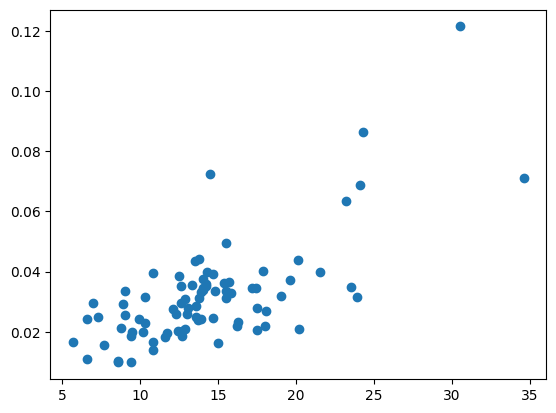

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.poverty_proc, df.procent_unemployed)

In [ ]:
model = sm.OLS(df[dependent_variable], df[independent_variables + ['const']])
results = model.fit(cov_type='HC0')

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     procent_unemployed   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     150.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.99e-42
Time:                        09:39:53   Log-Likelihood:                 279.17
No. Observations:                  83   AIC:                            -536.3
Df Residuals:                      72   BIC:                            -509.7
Df Model:                          10                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
depo_salary            0.0452      0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [ ]:
results_df = pd.DataFrame(results.summary().tables[1].data, columns=results.summary().tables[1])
results_df

,,coef,std err,z,P>|z|,[0.025,0.975]
,depo_salary,0.0452,0.003,15.272,0.000,0.039,0.051
,poverty_proc,0.0013,0.000,2.954,0.003,0.000,0.002
,infections,9.161e-09,1.77e-08,0.516,0.606,-2.56e-08,4.39e-08
,procent_infections,-0.1497,0.232,-0.644,0.519,-0.605,0.306
,fin_blago,-2.331e-05,0.000,-0.165,0.869,-0.000,0.000
,social_exp,5.492e-05,9.32e-05,0.590,0.556,-0.000,0.000
,growth_social_exp,-0.0002,0.000,-1.005,0.315,-0.000,0.000
,soc_in_total_exp,0.0001,0.000,0.597,0.550,-0.000,0.001
,vrp,-2.772e-09,3e-09,-0.923,0.356,-8.66e-09,3.12e-09
,vrp_norm,-0.0026,0.001,-2.460,0.014,-0.005,-0.001


In [ ]:
results_df.to_csv('/content/mat_model2.csv')

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print('P-value:', p_value)

# нулева ягипотеза отвергается -> в данных гетероскедастичность

P-value: 0.05156365818727555


In [ ]:
dict_coefs = {i:[] for i in independent_variables + ["const"]}
all_results = []

for i in range(len(independent_variables)+1):
    print("ok")
    cur_undepenent = independent_variables[:i] + ["const"]
    model = sm.OLS(df[dependent_variable], df[cur_undepenent])
    results = model.fit(cov_type='HC0')
    all_results.append(results)
    # coefs = results.params.to_dict()
    # for i in independent_variables + ["const"]:
    #     dict_coefs[i].append(coefs.get(i, None))
#%%
from statsmodels.iolib.summary2 import summary_col

results_table = summary_col(all_results, model_names=[f'Model {i}' for i in range(len(all_results))], stars=True)
#%%
print(results_table)

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok

                    Model 0   Model 1   Model 2   Model 3   Model 4   Model 5   Model 6   Model 7   Model 8   Model 9   Model 10
--------------------------------------------------------------------------------------------------------------------------------
const              0.0318*** 0.0143*** -0.0006   -0.0011   0.0002    0.0056    0.0038    0.0035    -0.0090   -0.0038   -0.0049  
                   (0.0019)  (0.0016)  (0.0031)  (0.0034)  (0.0035)  (0.0092)  (0.0092)  (0.0091)  (0.0181)  (0.0184)  (0.0177) 
depo_salary                  0.0632*** 0.0463*** 0.0463*** 0.0462*** 0.0457*** 0.0449*** 0.0443*** 0.0439*** 0.0439*** 0.0452***
                             (0.0060)  (0.0030)  (0.0030)  (0.0031)  (0.0033)  (0.0033)  (0.0032)  (0.0031)  (0.0030)  (0.0030) 
poverty_proc                           0.0014*** 0.0014*** 0.0015*** 0.0013*** 0.0013*** 0.0013*** 0.0013*** 0.0012*** 0.0013***
                                       (0.0003)  (0.0003)  (0.0

In [ ]:
indexes = ['R-squared', 'R-squared Adj.'] + independent_variables
df_results = pd.DataFrame(results_table.tables[0])

In [ ]:
index_list = df_results.index.tolist()
new_ind = []

for i in range(len(index_list)):
    if index_list[i] == '':
        new_ind.append(index_list[i-1] + '_coef')
    else:
         new_ind.append(index_list[i])

new_ind

['const',
 'const_coef',
 'depo_salary',
 'depo_salary_coef',
 'poverty_proc',
 'poverty_proc_coef',
 'infections',
 'infections_coef',
 'procent_infections',
 'procent_infections_coef',
 'fin_blago',
 'fin_blago_coef',
 'social_exp',
 'social_exp_coef',
 'growth_social_exp',
 'growth_social_exp_coef',
 'soc_in_total_exp',
 'soc_in_total_exp_coef',
 'vrp',
 'vrp_coef',
 'vrp_norm',
 'vrp_norm_coef',
 'R-squared',
 'R-squared Adj.']

In [ ]:
sort_ind = []

for i in independent_variables:
    sort_ind.append(i)
    sort_ind.append(i+'_coef')

indexes = ['R-squared', 'R-squared Adj.'] + sort_ind

In [ ]:
df_results.index = new_ind
df_results

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10
const,0.0318***,0.0143***,-0.0006,-0.0011,0.0002,0.0056,0.0038,0.0035,-0.0090,-0.0038,-0.0049
const_coef,(0.0019),(0.0016),(0.0031),(0.0034),(0.0035),(0.0092),(0.0092),(0.0091),(0.0181),(0.0184),(0.0177)
depo_salary,,0.0632***,0.0463***,0.0463***,0.0462***,0.0457***,0.0449***,0.0443***,0.0439***,0.0439***,0.0452***
depo_salary_coef,,(0.0060),(0.0030),(0.0030),(0.0031),(0.0033),(0.0033),(0.0032),(0.0031),(0.0030),(0.0030)
poverty_proc,,,0.0014***,0.0014***,0.0015***,0.0013***,0.0013***,0.0013***,0.0013***,0.0012***,0.0013***
poverty_proc_coef,,,(0.0003),(0.0003),(0.0003),(0.0004),(0.0004),(0.0004),(0.0004),(0.0004),(0.0004)
infections,,,,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
infections_coef,,,,(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)
procent_infections,,,,,-0.2490,-0.1889,-0.1874,-0.1828,-0.1619,-0.1450,-0.1497
procent_infections_coef,,,,,(0.1695),(0.2305),(0.2305),(0.2277),(0.2356),(0.2333),(0.2323)


In [ ]:
final = df_results.loc[indexes]

In [ ]:
final

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10
R-squared,0.0000,0.5976,0.7252,0.7258,0.7342,0.7354,0.7376,0.7392,0.7446,0.7490,0.7548
R-squared Adj.,0.0000,0.5927,0.7183,0.7154,0.7205,0.7182,0.7169,0.7149,0.7170,0.7181,0.7208
depo_salary,,0.0632***,0.0463***,0.0463***,0.0462***,0.0457***,0.0449***,0.0443***,0.0439***,0.0439***,0.0452***
depo_salary_coef,,(0.0060),(0.0030),(0.0030),(0.0031),(0.0033),(0.0033),(0.0032),(0.0031),(0.0030),(0.0030)
poverty_proc,,,0.0014***,0.0014***,0.0015***,0.0013***,0.0013***,0.0013***,0.0013***,0.0012***,0.0013***
poverty_proc_coef,,,(0.0003),(0.0003),(0.0003),(0.0004),(0.0004),(0.0004),(0.0004),(0.0004),(0.0004)
infections,,,,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
infections_coef,,,,(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000),(0.0000)
procent_infections,,,,,-0.2490,-0.1889,-0.1874,-0.1828,-0.1619,-0.1450,-0.1497
procent_infections_coef,,,,,(0.1695),(0.2305),(0.2305),(0.2277),(0.2356),(0.2333),(0.2323)


In [ ]:
final.to_csv('/content/lesenka.csv')